In [1]:
# using https://medium.com/analytics-vidhya/using-linear-regression-to-predict-aapl-apple-stock-prices-in-python-1a629fbea15b

import numpy as np # linear algebra
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df=df[['Close']] 
df=df.dropna()

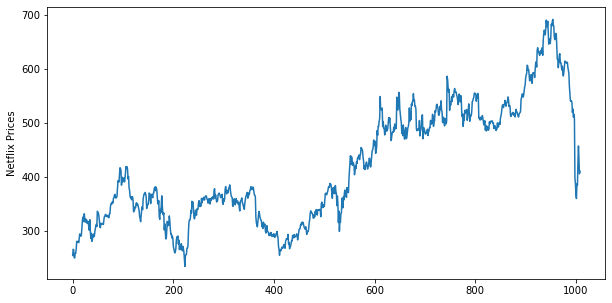

In [5]:
df.Close.plot(figsize=(10,5)) 
plt.ylabel("Netflix Prices")
plt.show()

In [6]:
df['S_3'] = df['Close'].shift(1).rolling(window=3).mean() 
df['S_9']= df['Close'].shift(1).rolling(window=9).mean() 
df= df.dropna() 
X = df[['S_3','S_9']] 
X.head()

,S_3,S_9
9,268.179993,260.733332
10,274.929993,263.428887
11,279.113322,264.854441
12,279.369995,266.685554
13,279.243337,269.801110


In [7]:
y = df['Close']
y.head()

9     278.519989
10    278.549988
11    281.040009
12    278.140015
13    285.929993
Name: Close, dtype: float64

In [9]:
t=.8 
t = int(t*len(df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [10]:
linear = LinearRegression().fit(X_train,y_train)

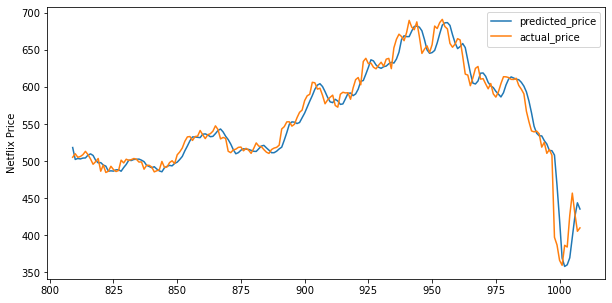

In [12]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Netflix Price")  
plt.show()